# <p style="background-color:palegreen; font-family:calibri; font-size:180%; text-align:center"> Time Series Analysis 📊⚙️ </p>

**Understanding the Problem:**

The goal is to predict water availability (level or flow) for each type of waterbody using historical data. Key tasks include:

- Analyzing relationships between features and water availability for each waterbody.
- Building separate models for aquifers, water springs, rivers, and lakes.
- Ensuring the models can generalize to other waterbodies not part of the competition.

------------------------------------------------------------------------------------------------------------------------------------------------

## <p style="font-family:calibri; font-size:120%; text-align:left">Index :</p>

After carefull consideration of all the 9 datasets provided with the **Kaggle** challenge, to perform the study, it has been selected the dataset "Aquifer_Petrignano".
This **is the most complete dataset and with a representative variety of variables to perform a complete stuty**.



# <p style="background-color:pink; font-family:calibri; font-size:180%; text-align:center"> Aquifer_Petrignano 🌊 </p> 

Information about Petrignano aquifer dataset:

- It is fed by three underground aquifers separated by low permeability septa.

- The water table can be considered groundwater and is also fed by the Chiascio river.

Variables that are foun in the dataset and meanig:

**Date:**	Daily Date 	Uniquely identifies a day (Primary Key)				Code	Values			

**Rainfall_X:** 	It indicates the quantity of rain falling, expressed in millimeters (mm), in the area -> Bastia_Umbra		

**Depth_to_Groundwater_Y:** Indicates the groundwater level in meters from the ground floor, detected by the piezometer -> P24, P25

**Temperature_Z:** Temperature expressed in °C, detected by the thermometric station ->	Bastia_Umbra, Petrignano

**Volume_K:** Volume of water expressed in cubic meters (mc), taken from the drinking water plant -> C10_Petrignano

**Hydrometry_H:** Indicates the groundwater level, expressed in meters (m), detected by the hydrometric station -> Fiume_Chiascio_Petrignano



In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/workspaces/Time-Series-Project.FGM/data/raw/Aquifer_Petrignano.csv")
data.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


- Lets get information about the data:

In [4]:
data.shape

(5223, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [ ]:
def column_summary(data):
    summary_data = []
    
    for col_name in data.columns:
        col_dtype = data[col_name].dtype
        num_of_nulls = data[col_name].isnull().sum()
        num_of_non_nulls = data[col_name].notnull().sum()
        num_of_distinct_values = data[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = data[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = data[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_data = pd.DataFrame(summary_data)
    return summary_data


summary_data = column_summary(data)
display(summary_data)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Date,object,0,5223,5223,"{'14/03/2006': 1, '12/09/2015': 1, '30/09/2015..."
1,Rainfall_Bastia_Umbra,float64,1024,4199,223,"{0.0: 3147, 0.2: 139, 0.1: 64, 0.4: 46, 0.6: 4..."
2,Depth_to_Groundwater_P24,float64,55,5168,1306,"{-27.13: 18, -27.16: 15, -26.96: 14, -24.77: 1..."
3,Depth_to_Groundwater_P25,float64,39,5184,1298,"{-26.38: 18, -26.45: 18, -26.36: 17, -26.24: 1..."
4,Temperature_Bastia_Umbra,float64,1024,4199,336,"{11.4: 31, 14.7: 26, 25.6: 25, 20.6: 24, 9.8: ..."
5,Temperature_Petrignano,float64,1024,4199,320,"{0.0: 153, 10.3: 29, 12.8: 27, 10.1: 27, 13.6:..."
6,Volume_C10_Petrignano,float64,198,5025,4324,"{0.0: 30, -26551.584: 4, -31152.384: 4, -27076..."
7,Hydrometry_Fiume_Chiascio_Petrignano,float64,1024,4199,25,"{2.0: 574, 2.4: 419, 2.5: 413, 2.7: 378, 2.3: ..."


The number of nulls suggests that some values started to be registered from a specific date. Given that will explore historic data distribution:

In [8]:
# Detecting duplicates based on specific columns

duplicates_specific = data[data.duplicated(subset=['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra', 'Temperature_Petrignano', 'Volume_C10_Petrignano', 'Hydrometry_Fiume_Chiascio_Petrignano'])]
print("Duplicates based on specific columns:")
print(duplicates_specific)

Duplicates based on specific columns:
Empty DataFrame
Columns: [Date, Rainfall_Bastia_Umbra, Depth_to_Groundwater_P24, Depth_to_Groundwater_P25, Temperature_Bastia_Umbra, Temperature_Petrignano, Volume_C10_Petrignano, Hydrometry_Fiume_Chiascio_Petrignano]
Index: []


No duplicates have been found in the dataset.

Now lets proceed with the investigation:


Managing NaN:

In [9]:
# Check for NaN values in each column
print("NaN Values Count Per Column:")
print(data.isna().sum())

NaN Values Count Per Column:
Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64


Theres a considerable number of NaN values that will need to clean in next steps.

Managing zeros:

In [10]:
# Count zeros in each column
zero_counts = (data == 0).sum()

# Display columns with zero counts
print("Count of Zeros in Each Column:")
print(zero_counts)

Count of Zeros in Each Column:
Date                                       0
Rainfall_Bastia_Umbra                   3147
Depth_to_Groundwater_P24                   0
Depth_to_Groundwater_P25                   0
Temperature_Bastia_Umbra                   7
Temperature_Petrignano                   153
Volume_C10_Petrignano                     30
Hydrometry_Fiume_Chiascio_Petrignano     150
dtype: int64


Also, many zeros have been found, probably due to lack of sensors placed, therefore will clean them.

After reviewing the data quality, will clean the NaN from the variables: 'Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra', 
                    'Temperature_Petrignano', 'Hydrometry_Fiume_Chiascio_Petrignano', 'Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25', 'Volume_C10_Petrignano'.

In [11]:
columns_to_clean = ['Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra', 
                    'Temperature_Petrignano', 'Hydrometry_Fiume_Chiascio_Petrignano', 'Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25', 'Volume_C10_Petrignano']
data_cleaned = data.dropna(subset=columns_to_clean).reset_index(drop=True)

data_cleaned

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,02/01/2009,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,03/01/2009,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,04/01/2009,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3
...,...,...,...,...,...,...,...,...
4145,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
4146,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
4147,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
4148,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [12]:
# Display the number of rows before and after cleaning
print(f"Original rows: {data.shape[0]}")
print(f"Rows after NaN removal: {data_cleaned.shape[0]}")

# Check for remaining NaN values in the dataset
print("\nRemaining NaN values per column:")
print(data_cleaned.isna().sum())

Original rows: 5223
Rows after NaN removal: 4150

Remaining NaN values per column:
Date                                    0
Rainfall_Bastia_Umbra                   0
Depth_to_Groundwater_P24                0
Depth_to_Groundwater_P25                0
Temperature_Bastia_Umbra                0
Temperature_Petrignano                  0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64


There's no remaining NaNs in the dataset.

In [13]:
# Count zeros in each column
zero_counts = (data_cleaned == 0).sum()

# Display columns with zero counts
print("Count of Zeros in Each Column:")
print(zero_counts)

Count of Zeros in Each Column:
Date                                       0
Rainfall_Bastia_Umbra                   3113
Depth_to_Groundwater_P24                   0
Depth_to_Groundwater_P25                   0
Temperature_Bastia_Umbra                   7
Temperature_Petrignano                   153
Volume_C10_Petrignano                     25
Hydrometry_Fiume_Chiascio_Petrignano     150
dtype: int64


Although containing zeros, the dataset is free from NaN and now we are ready to work with it.

Now lets proceed to data represetation. To do taht we will need to transfor 'Date' into a more simple date objet:

In [14]:
from datetime import datetime

# Ensure the 'Date' column is properly formatted
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%d/%m/%Y')

# Verify the changes visually with a styled preview
data_cleaned.head().style.set_properties(subset=['Date'], **{'background-color': 'lightpink'})

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-01-01 00:00:00,0.000000,-31.960000,-31.140000,5.200000,4.900000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-32.030000,-31.110000,2.300000,2.500000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.970000,-31.070000,4.400000,3.900000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.910000,-31.050000,0.800000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.940000,-31.010000,-1.900000,-2.100000,-29854.656000,2.300000


Now lets graph teh variables:

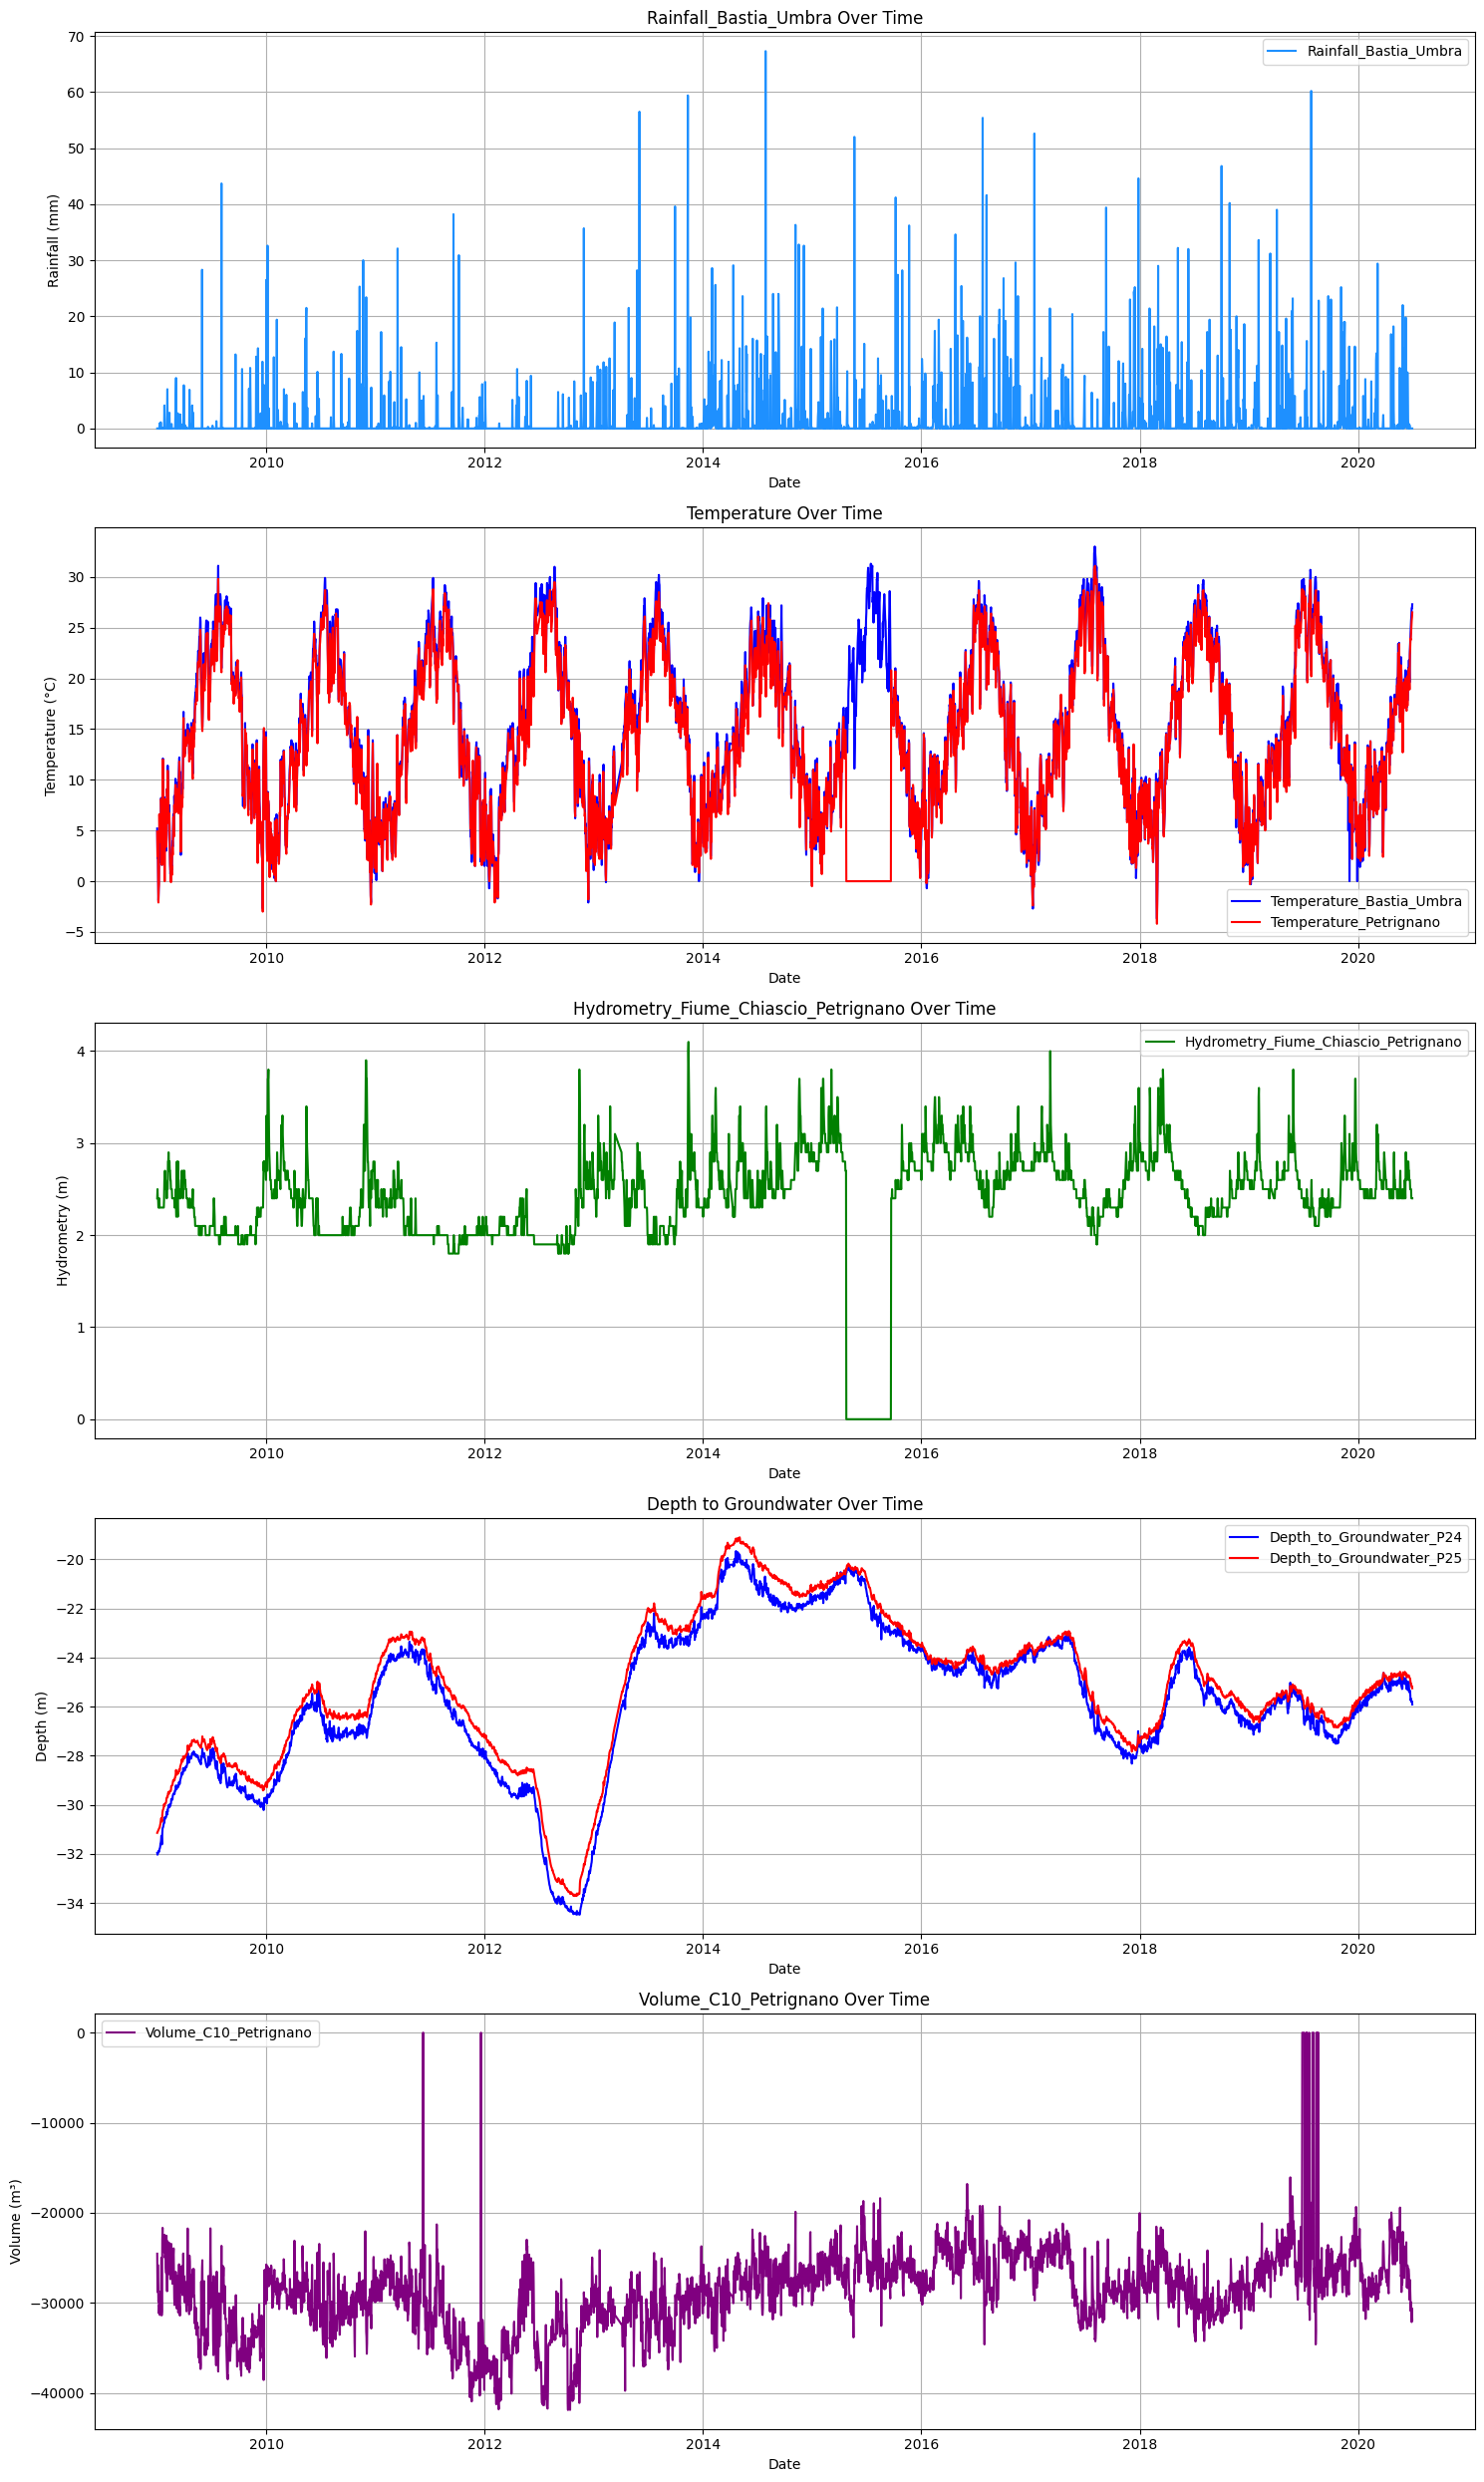

In [15]:
import matplotlib.pyplot as plt

# Variables to plot
variables = [
    'Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra',
    'Temperature_Petrignano', 'Hydrometry_Fiume_Chiascio_Petrignano', 
    'Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25', 
    'Volume_C10_Petrignano'
]

# Create subplots for each variable
plt.figure(figsize=(15, 25))

# Plot Rainfall
plt.subplot(5, 1, 1)
plt.plot(data_cleaned['Date'], data_cleaned['Rainfall_Bastia_Umbra'], label='Rainfall_Bastia_Umbra', color='dodgerblue')
plt.title('Rainfall_Bastia_Umbra Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.grid()
plt.legend()

# Plot both temperatures in the same graph
plt.subplot(5, 1, 2)
plt.plot(data_cleaned['Date'], data_cleaned['Temperature_Bastia_Umbra'], label='Temperature_Bastia_Umbra', color='blue')
plt.plot(data_cleaned['Date'], data_cleaned['Temperature_Petrignano'], label='Temperature_Petrignano', color='red')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()

# Plot Hydrometry
plt.subplot(5, 1, 3)
plt.plot(data_cleaned['Date'], data_cleaned['Hydrometry_Fiume_Chiascio_Petrignano'], label='Hydrometry_Fiume_Chiascio_Petrignano', color='green')
plt.title('Hydrometry_Fiume_Chiascio_Petrignano Over Time')
plt.xlabel('Date')
plt.ylabel('Hydrometry (m)')
plt.grid()
plt.legend()

# Plot both Depth_to_Groundwater variables in the same graph
plt.subplot(5, 1, 4)
plt.plot(data_cleaned['Date'], data_cleaned['Depth_to_Groundwater_P24'], label='Depth_to_Groundwater_P24', color='blue')
plt.plot(data_cleaned['Date'], data_cleaned['Depth_to_Groundwater_P25'], label='Depth_to_Groundwater_P25', color='red')
plt.title('Depth to Groundwater Over Time')
plt.xlabel('Date')
plt.ylabel('Depth (m)')
plt.grid()
plt.legend()

# Plot Volume_C10_Petrignano
plt.subplot(5, 1, 5)
plt.plot(data_cleaned['Date'], data_cleaned['Volume_C10_Petrignano'], label='Volume_C10_Petrignano', color='purple')
plt.title('Volume_C10_Petrignano Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (m³)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


**Temperature_Bastia_Umbra & Temperature_Petrignano and Depth_to_Groundwater_24 & 25** follow each other perfectly, therefore one of them can be removed for simplification. The preference will be removing Temperature_Petrignano and Depth_to_Groundwater_P24 given they have blancs in the dataset and the other ones are complete.



In [16]:
# Dropping Temperature_Petrignano and Depth_to_Groundwater_P24 columns from 'data_cleaned':

data_cleaned = data_cleaned.drop(['Temperature_Petrignano', 'Depth_to_Groundwater_P24'], axis=1)

# Displaying the first few rows to confirm changes
data_cleaned.head()


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


In [17]:
# Count zeros in each column
zero_counts = (data_cleaned == 0).sum()

# Display columns with zero counts
print("Count of Zeros in Each Column:")
print(zero_counts)

Count of Zeros in Each Column:
Date                                       0
Rainfall_Bastia_Umbra                   3113
Depth_to_Groundwater_P25                   0
Temperature_Bastia_Umbra                   7
Volume_C10_Petrignano                     25
Hydrometry_Fiume_Chiascio_Petrignano     150
dtype: int64


In Time Series, it is important to handle the zeros in the way that allows the visual analysis and for the machine learning model. Usually I like to either remove the data, or substitute it by an interpolated value of the sorroundings. This ensure that the collected data by the sensor follows the trend of the points around and is coherent with the moment it was taken:

In [19]:
# List of variables to handle
variables_to_interpolate = [
    'Rainfall_Bastia_Umbra', 
    'Temperature_Bastia_Umbra', 
    'Volume_C10_Petrignano', 
    'Hydrometry_Fiume_Chiascio_Petrignano'
]

# Ensure the columns are numeric
for column in variables_to_interpolate:
    data_cleaned[column] = pd.to_numeric(data_cleaned[column], errors='coerce')

# Replace zeros with NaN to apply interpolation
data_cleaned[variables_to_interpolate] = data_cleaned[variables_to_interpolate].replace(0, pd.NA)

# Apply linear interpolation
data_cleaned[variables_to_interpolate] = data_cleaned[variables_to_interpolate].interpolate(method='linear')

In [20]:
# Check for any remaining NaNs
print(data_cleaned[variables_to_interpolate].isna().sum())

Rainfall_Bastia_Umbra                   8
Temperature_Bastia_Umbra                0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64


Now, after handling zeros, we can plot the varibales:

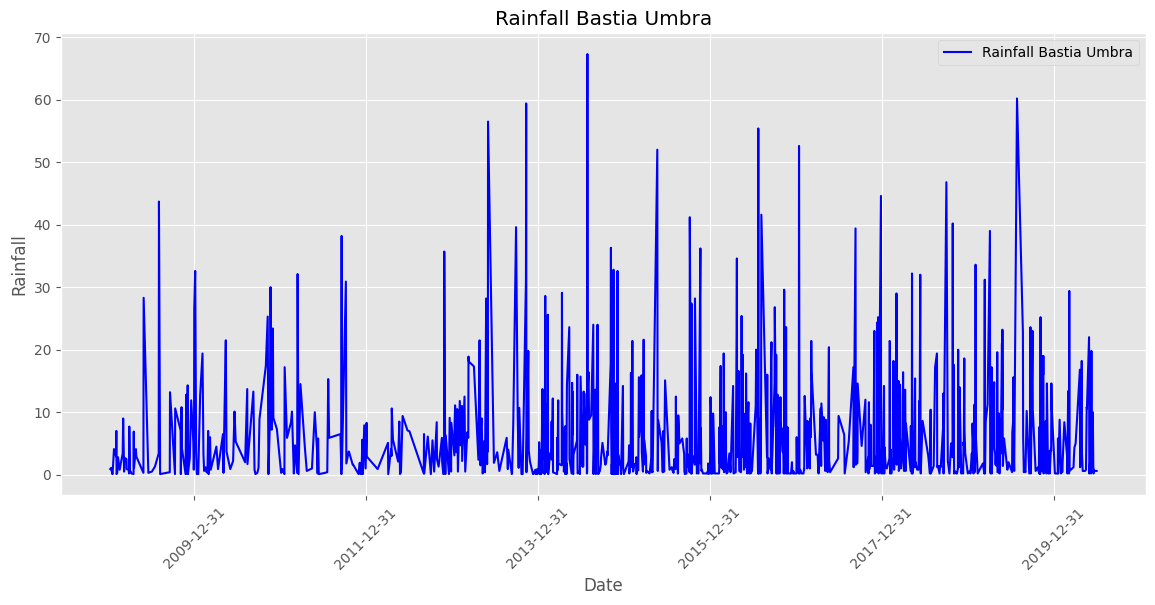

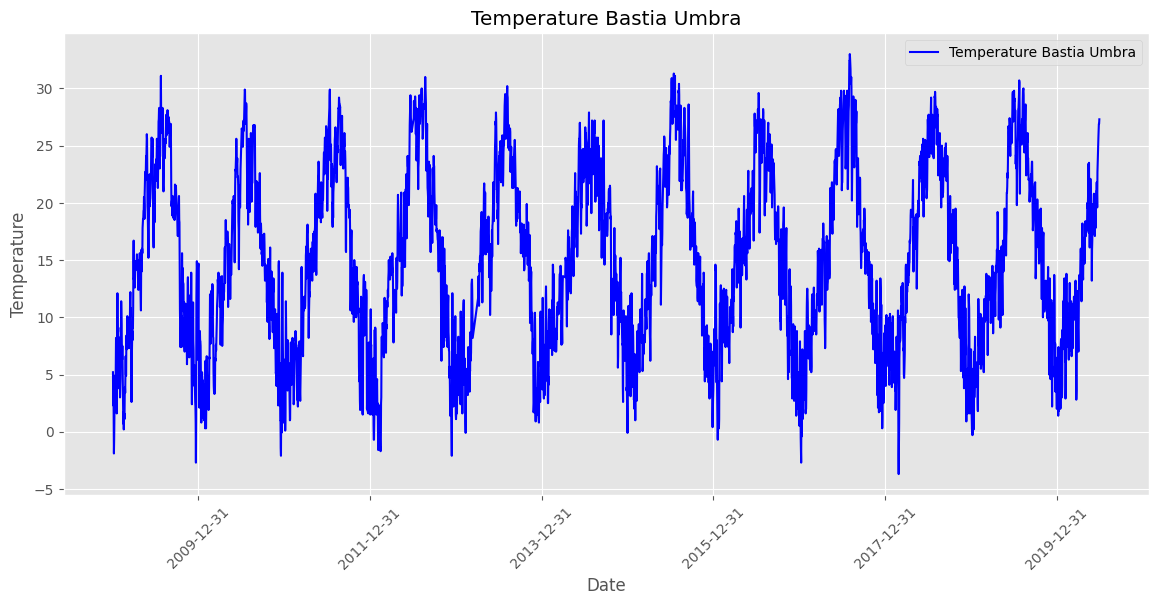

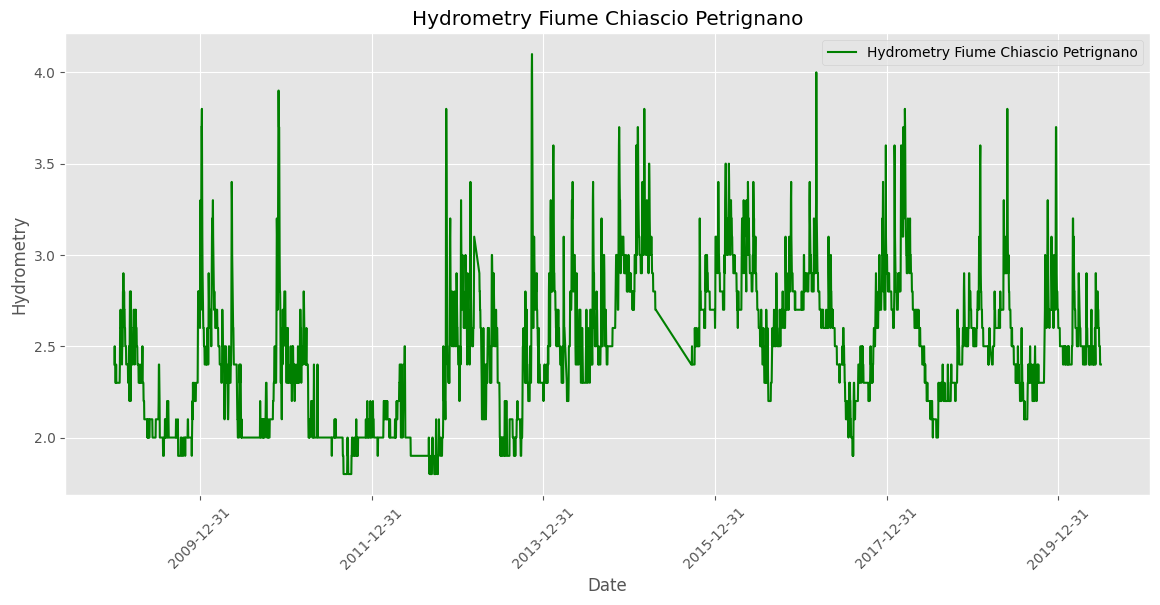

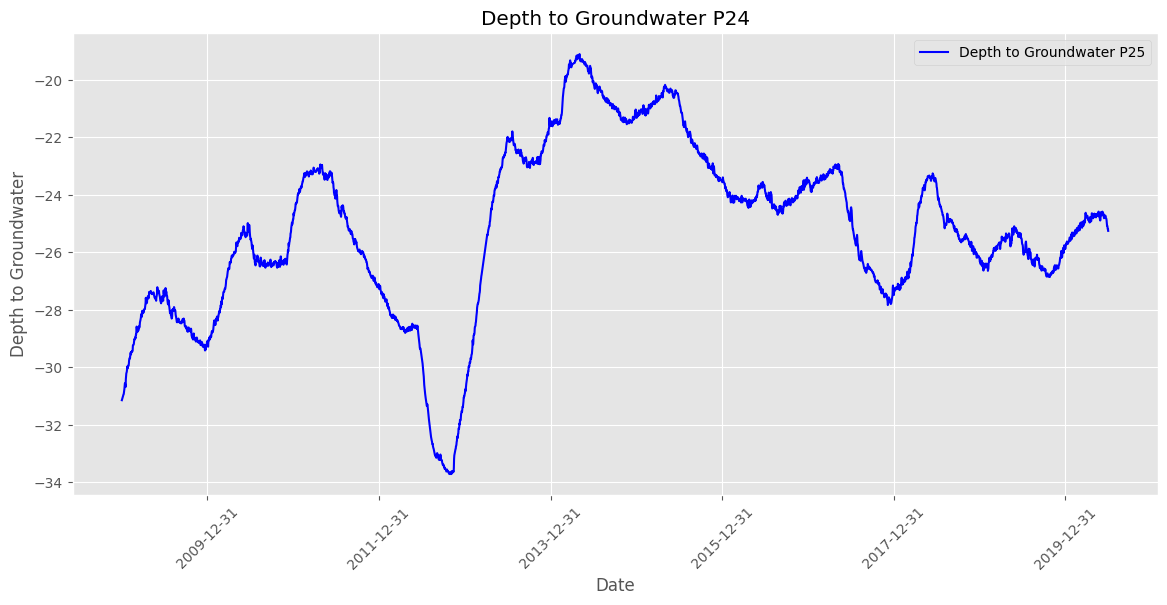

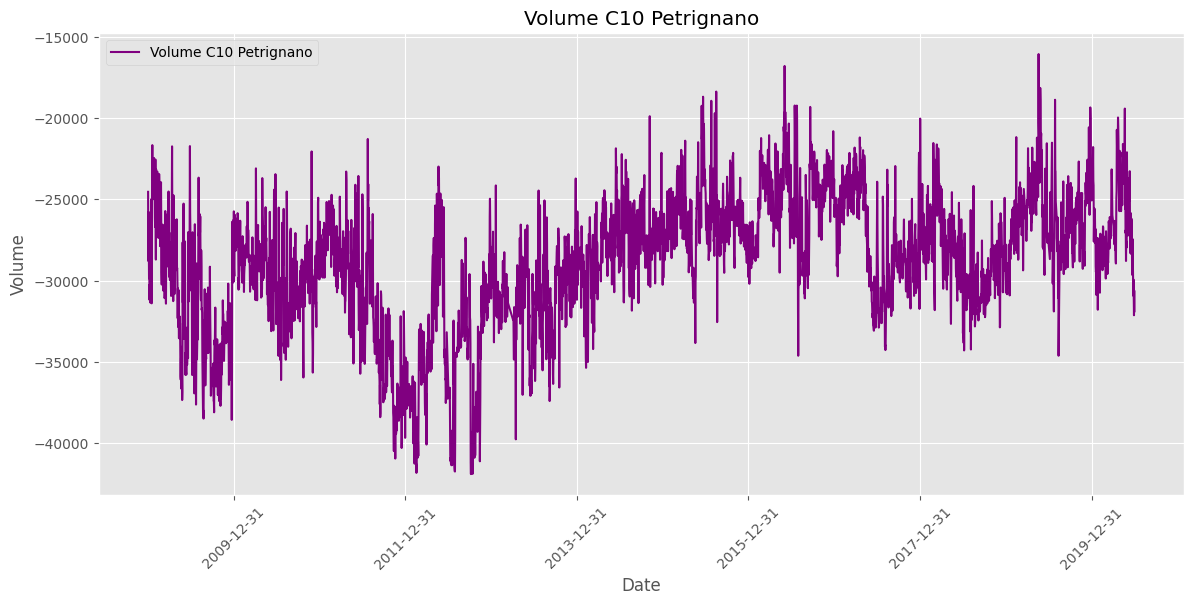

In [21]:
import matplotlib.pyplot as plt

# Set the fallback style
plt.style.use('ggplot')

# Variables to plot
variables_to_plot = ['Rainfall_Bastia_Umbra',
                     'Temperature_Bastia_Umbra',
                     'Hydrometry_Fiume_Chiascio_Petrignano',
                     'Depth_to_Groundwater_P25',
                     'Volume_C10_Petrignano']

# Plot Rainfall_Bastia_Umbra
plt.figure(figsize=(14, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Rainfall_Bastia_Umbra'], label='Rainfall Bastia Umbra', color='blue')
plt.title('Rainfall Bastia Umbra')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.xticks(pd.date_range(start='2009-01-01', end='2020-06-30', freq='2Y'), rotation=45)
plt.legend()
plt.show()

# Plot Temperature_Bastia_Umbra and Temperature_Petrignano in the same graph
plt.figure(figsize=(14, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Temperature_Bastia_Umbra'], label='Temperature Bastia Umbra', color='blue')
plt.title('Temperature Bastia Umbra')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(pd.date_range(start='2009-01-01', end='2020-06-30', freq='2Y'), rotation=45)
plt.legend()
plt.show()

# Plot Hydrometry_Fiume_Chiascio_Petrignano
plt.figure(figsize=(14, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Hydrometry_Fiume_Chiascio_Petrignano'], label='Hydrometry Fiume Chiascio Petrignano', color='green')
plt.title('Hydrometry Fiume Chiascio Petrignano')
plt.xlabel('Date')
plt.ylabel('Hydrometry')
plt.xticks(pd.date_range(start='2009-01-01', end='2020-06-30', freq='2Y'), rotation=45)
plt.legend()
plt.show()

# Plot Depth_to_Groundwater_P24 and Depth_to_Groundwater_P25 in the same graph
plt.figure(figsize=(14, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Depth_to_Groundwater_P25'], label='Depth to Groundwater P25', color='blue')
plt.title('Depth to Groundwater P24')
plt.xlabel('Date')
plt.ylabel('Depth to Groundwater')
plt.xticks(pd.date_range(start='2009-01-01', end='2020-06-30', freq='2Y'), rotation=45)
plt.legend()
plt.show()

# Plot Volume_C10_Petrignano
plt.figure(figsize=(14, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Volume_C10_Petrignano'], label='Volume C10 Petrignano', color='purple')
plt.title('Volume C10 Petrignano')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(pd.date_range(start='2009-01-01', end='2020-06-30', freq='2Y'), rotation=45)
plt.legend()
plt.show()

In data analysis, when handling large amount of data, it is interesting to graph weekly or monthly average, to smoth the charts and facilitate the visualisation of trends and events. In this case, will explore the weekly average visualisation:

In [22]:
# Ensure 'Date' is a datetime object
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Check for null values in 'Date' after conversion (if any invalid dates exist)
print(data_cleaned['Date'].isna().sum())

# Drop rows with invalid dates if necessary
data_cleaned = data_cleaned.dropna(subset=['Date'])

# Resample to calculate weekly averages
data_cleaned_w = data_cleaned.resample('7D', on='Date')[[
    'Rainfall_Bastia_Umbra', 
    'Temperature_Bastia_Umbra', 
    'Hydrometry_Fiume_Chiascio_Petrignano', 
    'Depth_to_Groundwater_P25', 
    'Volume_C10_Petrignano'
]].mean().reset_index()

# Display the first few rows of the weekly average data
data_cleaned_w.head()

0


,Date,Rainfall_Bastia_Umbra,Temperature_Bastia_Umbra,Hydrometry_Fiume_Chiascio_Petrignano,Depth_to_Groundwater_P25,Volume_C10_Petrignano
0,2009-01-01,NaN,1.657143,2.371429,-31.048571,-28164.918857
1,2009-01-08,0.983333,4.571429,2.314286,-30.784286,-29755.789714
2,2009-01-15,0.557143,7.528571,2.300000,-30.420000,-25463.190857
3,2009-01-22,3.414286,6.214286,2.500000,-30.018571,-23854.422857
4,2009-01-29,3.771429,5.771429,2.500000,-29.790000,-25210.532571


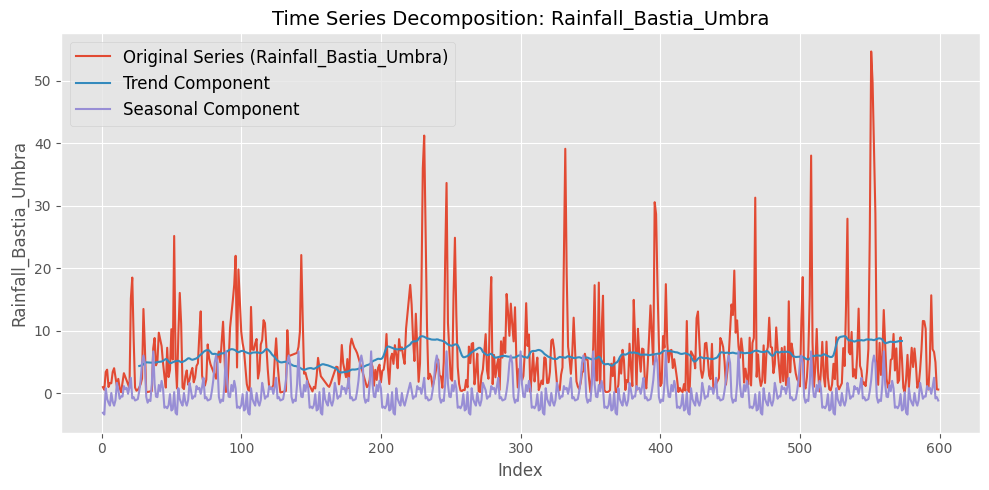

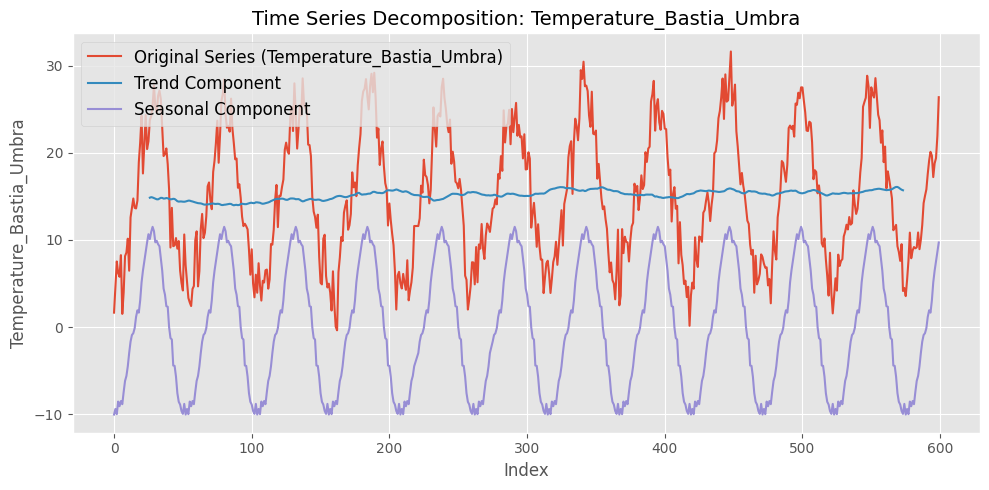

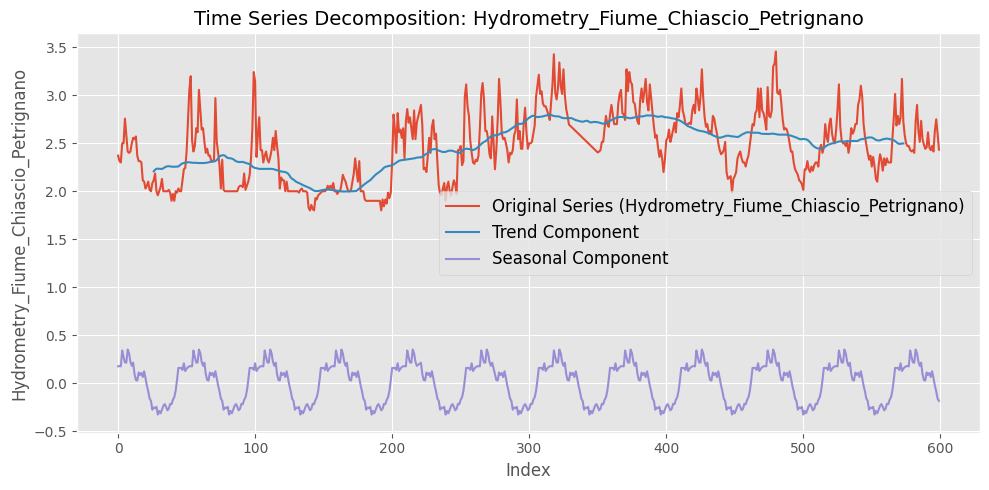

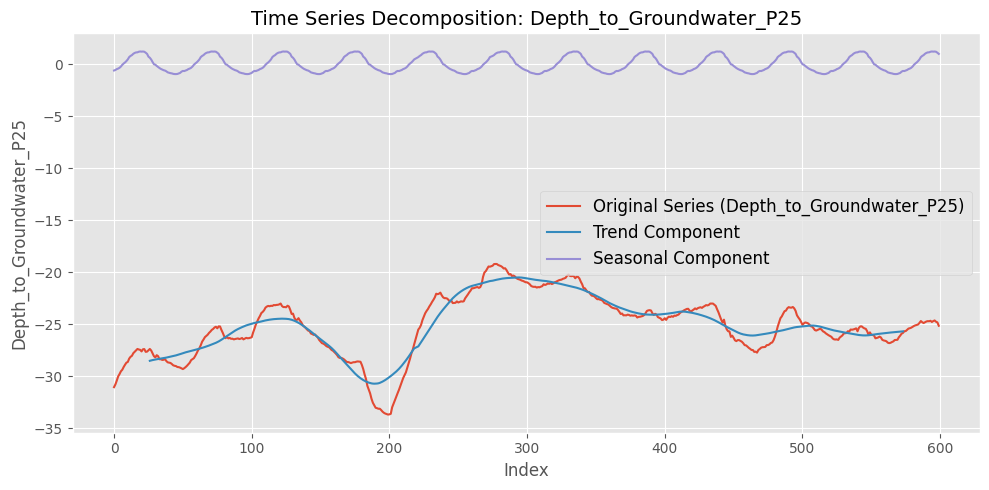

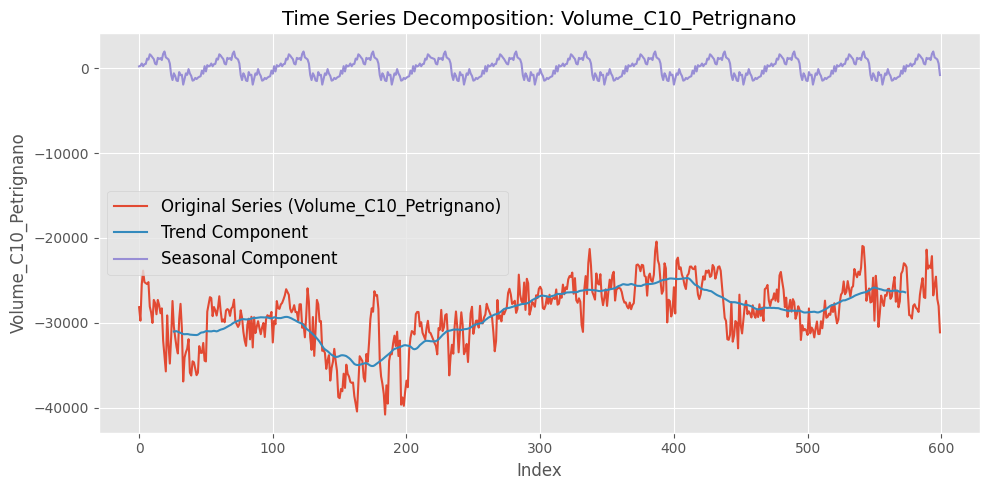

In [23]:
# Import necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt

# Variables to plot
variables = [
    'Rainfall_Bastia_Umbra',
    'Temperature_Bastia_Umbra',
    'Hydrometry_Fiume_Chiascio_Petrignano',
    'Depth_to_Groundwater_P25',
    'Volume_C10_Petrignano'
]

# Iterate over each variable for decomposition and plotting
for var in variables:
    # Extract time series data
    time_series = data_cleaned_w[var].dropna()  # Drop NaNs for decomposition
    
    # Decompose the time series (assuming a weekly period of 52 for yearly seasonality)
    decomposition = seasonal_decompose(time_series, period=52)
    trend = decomposition.trend  # Extract the trend component
    seasonal = decomposition.seasonal  # Extract the seasonal component

    # Plot the original time series, trend, and seasonal components
    fig, axis = plt.subplots(figsize=(10, 5))
    
    # Plot original series
    sns.lineplot(data=time_series, label=f"Original Series ({var})", ax=axis)
    
    # Plot trend component
    sns.lineplot(data=trend, label="Trend Component", ax=axis)
    
    # Plot seasonal component
    sns.lineplot(data=seasonal, label="Seasonal Component", ax=axis)
    
    # Customize plot
    axis.set_title(f"Time Series Decomposition: {var}", fontsize=14)
    axis.set_xlabel("Index", fontsize=12)
    axis.set_ylabel(var, fontsize=12)
    axis.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

In all the charts it can be observed seasonality. Most of the variables have coincidental periods.

As we can see:

- **depth_to_groundwater**: reaches its maximum around May/June and its minimum around November
- **temperature**: reaches its maximum around August and its minimum around January
- **drainage_volume**: reaches its minimum around July.
- **river_hydrometry**: reaches its maximum around February/March and its minimum around September

Now the dataset is completelly clean and ready for the analysis.

On multiple time series variables, it is simportant to ensure the stationarity of them all due to:

- Non-stationary series often lead to misleading or unreliable results in models.

- ransformations (such as differencing or detrending) might be required if the series is found to be non-stationary.

- The visualizations help in understanding the characteristics of the time series and guide the necessary transformations for further analysis (like forecasting).



In [24]:
# Importing the necessary library
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Define the Dickey-Fuller test function
def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    return dfoutput

# Handle missing or infinite values in the series
depth_groundwater_series = data_cleaned_w["Depth_to_Groundwater_P25"]  # Extracting the series
depth_groundwater_series = depth_groundwater_series.dropna()  # Drop NaNs
depth_groundwater_series = depth_groundwater_series.replace([float('inf'), -float('inf')], float('nan')).dropna()  # Drop inf

# Perform the test on the cleaned 'Depth_to_Groundwater_P25' variable
dickey_fuller_results = test_stationarity(depth_groundwater_series)

# Printing the results
print(dickey_fuller_results)

# Interpret the results
if dickey_fuller_results["p-value"] < 0.05:
    print("\nThe null hypothesis is rejected. The series is stationary.")
else:
    print("\nThe null hypothesis cannot be rejected. The series is non-stationary.")


Dickey-Fuller test results:
Test Statistic                  -2.899971
p-value                          0.045351
#Lags Used                       7.000000
Number of Observations Used    589.000000
Critical Value (1%)             -3.441501
Critical Value (5%)             -2.866460
Critical Value (10%)            -2.569390
dtype: float64

The null hypothesis is rejected. The series is stationary.


Now will perform the Dickey-Fuller Test over the other variables and then check for the stationarity:

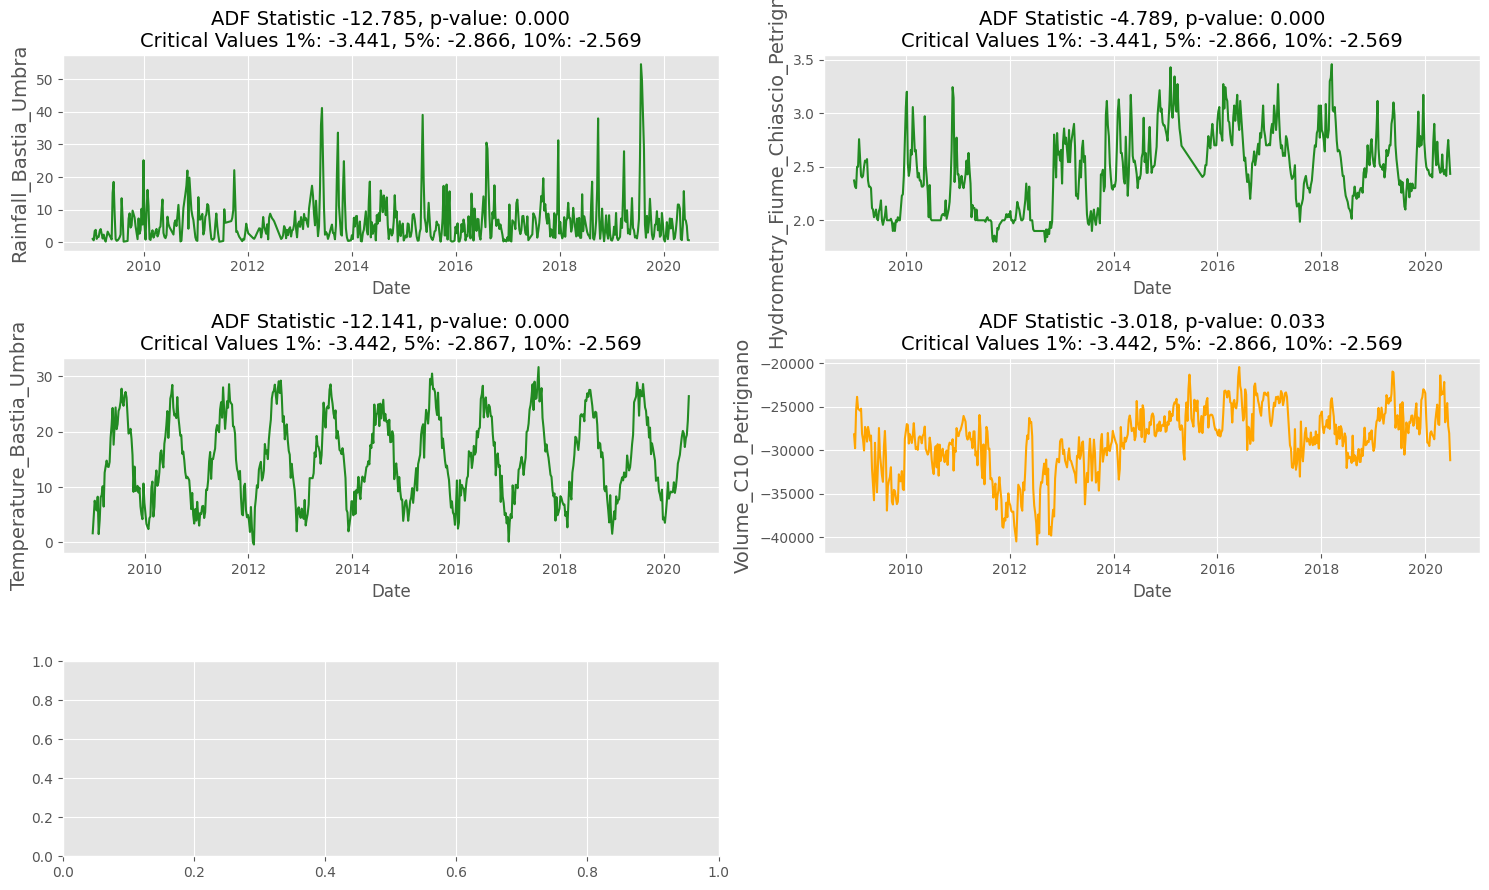

In [25]:
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
data_cleaned_w['Date'] = pd.to_datetime(data_cleaned_w['Date'])

# Define the Dickey-Fuller test function
def visualize_adfuller_results(series, title, ax):
    # Handle missing values by aligning the Date column with the series
    valid_data = data_cleaned_w[['Date', series]].dropna()  # Drop rows with NaN in 'Date' or the series
    x_values = valid_data['Date']
    y_values = valid_data[series]
    
    # Perform the ADF test
    result = adfuller(y_values)
    
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    # Color coding based on the ADF statistic and p-value
    if (p_val < significance_level) & (adf_stat < crit_val_1):
        linecolor = 'forestgreen'  # Highly stationary
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'  # Likely stationary
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'  # Might be stationary
    else:
        linecolor = 'purple'  # Likely non-stationary
    
    # Plot the series with color coding
    sns.lineplot(x=x_values, y=y_values, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

# Create subplots for visualizing the results
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

# Perform the ADF test and visualize results for each variable (excluding Depth_to_Groundwater_P25)
visualize_adfuller_results('Rainfall_Bastia_Umbra', 'Rainfall_Bastia_Umbra', ax[0, 0])
visualize_adfuller_results('Temperature_Bastia_Umbra', 'Temperature_Bastia_Umbra', ax[1, 0])
visualize_adfuller_results('Hydrometry_Fiume_Chiascio_Petrignano', 'Hydrometry_Fiume_Chiascio_Petrignano', ax[0, 1])
visualize_adfuller_results('Volume_C10_Petrignano', 'Volume_C10_Petrignano', ax[1, 1])

# Remove the empty subplot in the last row
f.delaxes(ax[2, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

All the variables meet the Alternative hypothesis p < 0.05: All are stationary, and meet the requirement to perform the ARIMA model.

Looking closer to the seasonal components represented below, we can extract the following conclussion:

- The seasonal component is strong.
- All the variables seem to be dependent to rainfall.

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns = [
    'Rainfall_Bastia_Umbra',
    'Temperature_Bastia_Umbra',
    'Hydrometry_Fiume_Chiascio_Petrignano',
    'Depth_to_Groundwater_P25',
    'Volume_C10_Petrignano'
]

# Decompose each variable and add the seasonal component to the DataFrame
for column in core_columns:
    decomposition = seasonal_decompose(data_cleaned_w[column].dropna(), period=52)
    data_cleaned_w[f'{column}_seasonal'] = decomposition.seasonal

print(data_cleaned_w.columns)

Index(['Date', 'Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra',
       'Hydrometry_Fiume_Chiascio_Petrignano', 'Depth_to_Groundwater_P25',
       'Volume_C10_Petrignano', 'Rainfall_Bastia_Umbra_seasonal',
       'Temperature_Bastia_Umbra_seasonal',
       'Hydrometry_Fiume_Chiascio_Petrignano_seasonal',
       'Depth_to_Groundwater_P25_seasonal', 'Volume_C10_Petrignano_seasonal'],
      dtype='object')


In [27]:
for column in core_columns:
    seasonal_col = f'{column}_seasonal'
    if seasonal_col not in data_cleaned_w:
        print(f"Missing column: {seasonal_col}")

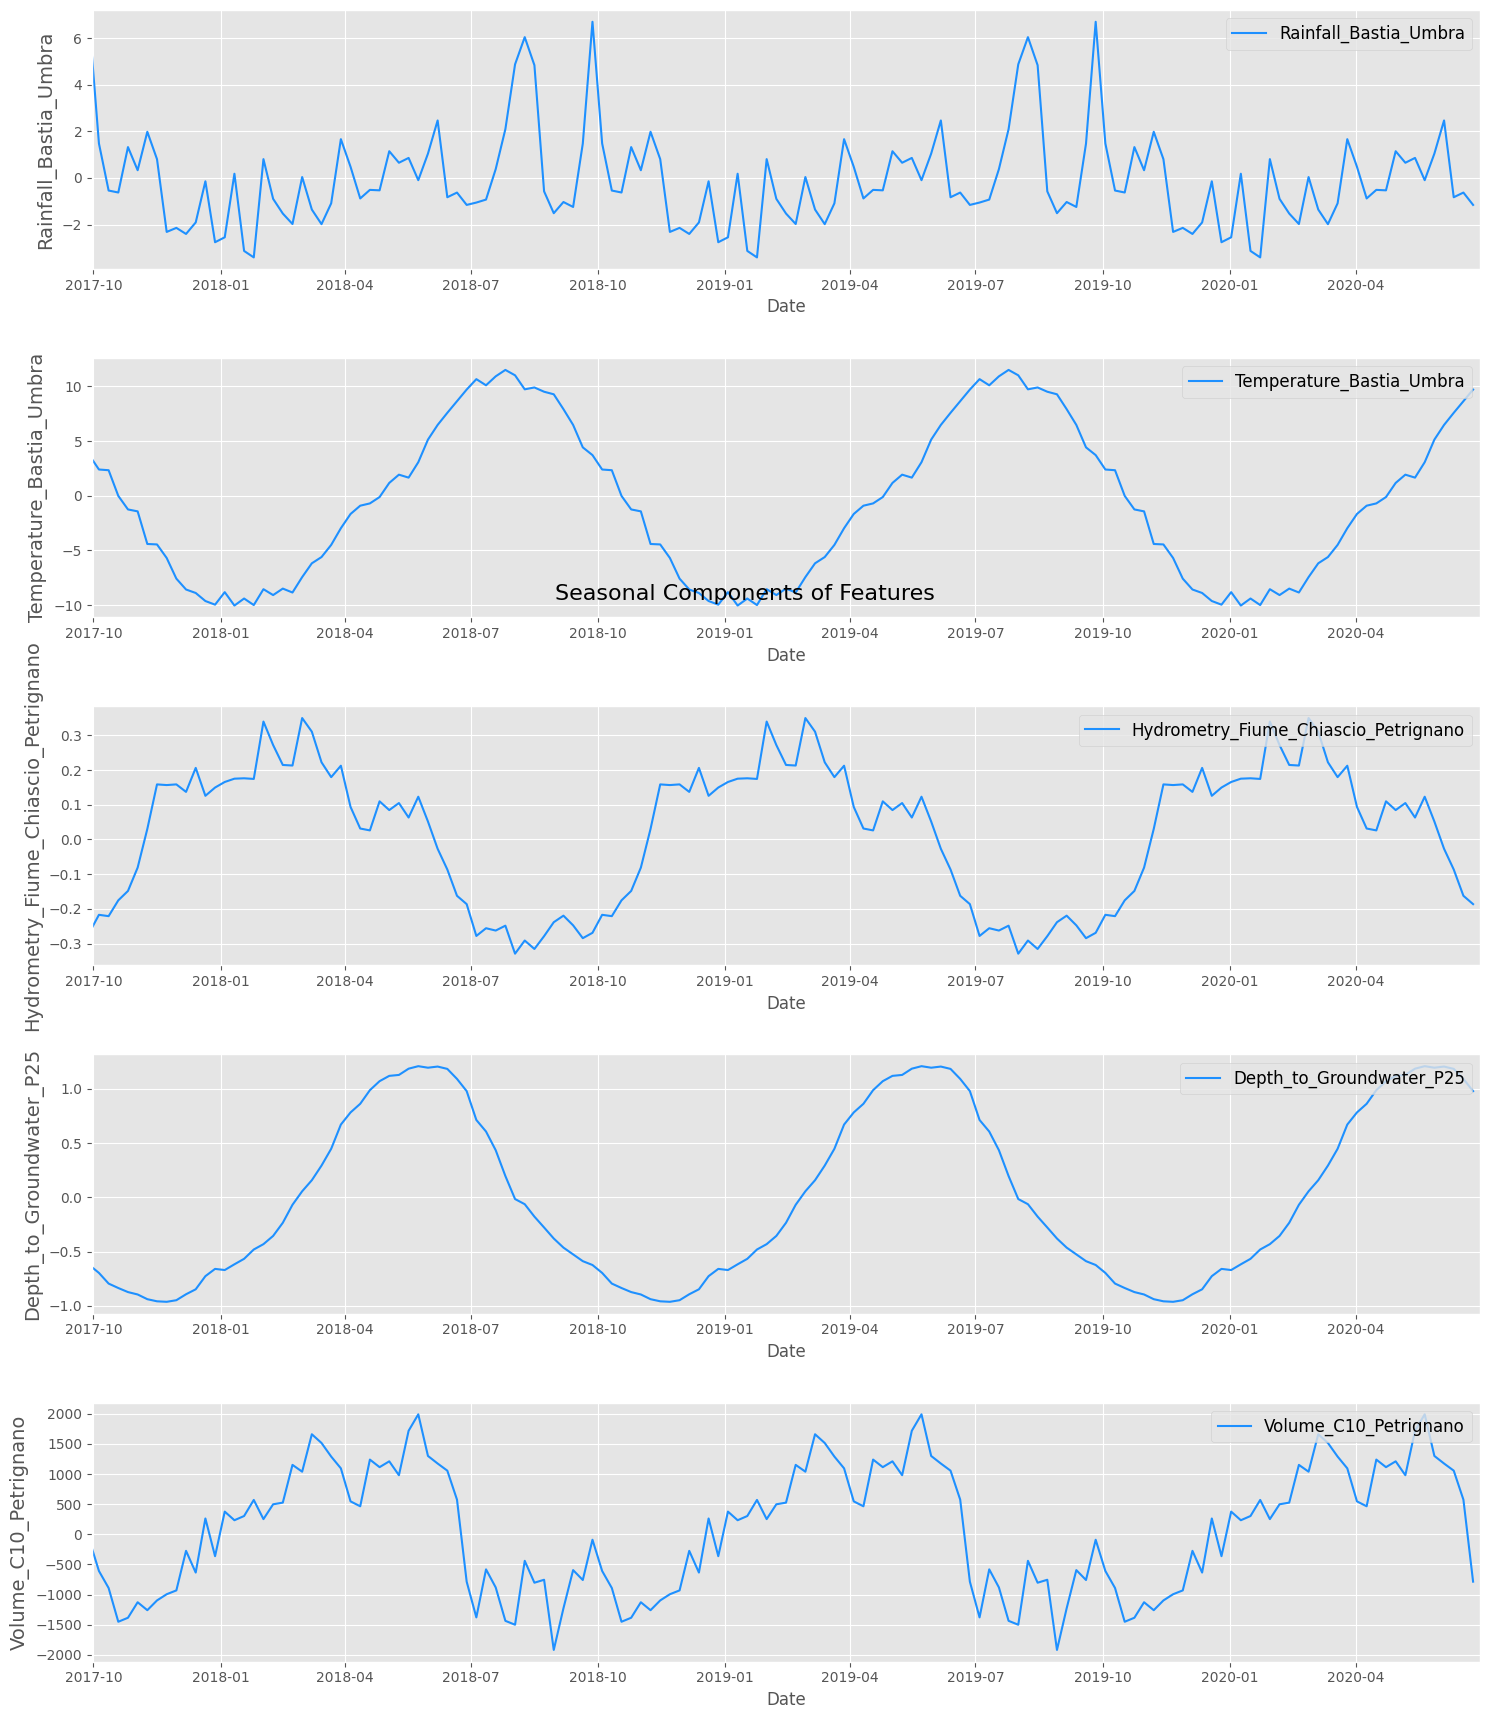

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

f, ax = plt.subplots(nrows=len(core_columns), ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(
        x=data_cleaned_w['Date'], 
        y=data_cleaned_w[f'{column}_seasonal'], 
        ax=ax[i], 
        color='dodgerblue', 
        label=column
    )
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    ax[i].legend(loc='upper right', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 1.5], h_pad=3)
plt.show()

As we can see:

- **depth_to_groundwater**: reaches its maximum around May/June and its minimum around November
- **temperature**: reaches its maximum around August and its minimum around Januaryº
- **drainage_volume**: reaches its minimum around July.
- **river_hydrometry**: reaches its maximum around February/March and its minimum around September

The evidence shows that 'Rainfall' conditions all the other variables. After the rain, the river hydrometry raises, creating a positive effect on the ground level aquifers, and the volume in the wells.

Now, will determine mathematically the seasonal component to add the factor in the model. For this, will do the autocorrelation analysis:

Autocorrelation analysis measures the correlation of a time series with its own lagged values. It is crucial for ARIMA modeling because hwlps to:

- Identify Seasonality: Peaks in autocorrelation at regular lags can indicate seasonal patterns, helping decide whether a seasonal component is necessary in the model.

- Model Order Selection: The autocorrelation function (ACF) and partial autocorrelation function (PACF) guide the selection of ARIMA model parameters:

        AR (Auto-Regressive) Order (p): The number of significant lags in the PACF.
        MA (Moving Average) Order (q): The number of significant lags in the ACF.

- Checking for Stationarity: If significant autocorrelations exist at high lags, the series might not be stationary and require differencing.

- Model Validation: After fitting an ARIMA model, autocorrelation analysis of residuals can check for model adequacy.

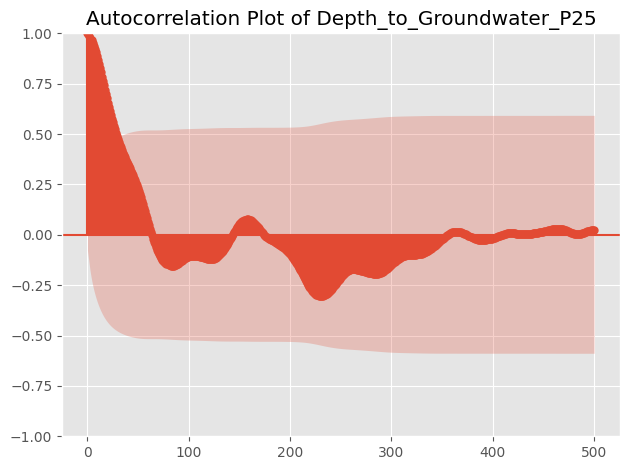

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Extract the time series for 'Depth_to_Groundwater_P25'
time_series = data_cleaned_w['Depth_to_Groundwater_P25'].dropna()

# Plot the autocorrelation of the time series
plot_acf(time_series, lags=500)  # Adjusting to 40 lags for detailed analysis

plt.title("Autocorrelation Plot of Depth_to_Groundwater_P25")
plt.tight_layout()
plt.show()

From the autocorrelation plot, we can draw the following conclusions:

**High Initial Autocorrelation**

The autocorrelation is very high (close to 1) at lag 1 and remains strong for a few lags before gradually decaying.
This suggests that the time series has a strong dependence on its immediate past values, which could indicate the presence of trends (we have proven the existence with the previous graphs).

**Slow Decay:**

The slow decay in autocorrelation is a typical pattern in non-stationary time series. This suggests that the series might require differencing to remove the trend and achieve stationarity, a key prerequisite for ARIMA.

**Seasonal Pattern:**

We can observe periodic peaks at specific lags. If these peaks align with known seasonal intervals (e.g., weekly or yearly patterns in the dataset), it indicates seasonality.

Given that seasonality exists, we will need to consider incorporating a seasonal component S-ARIMA.
Lags Beyond Confidence Bounds:

PS: Significant autocorrelation beyond the first few lags (outside the shaded confidence interval) means there are dependencies at those lags that ARIMA can capture through its AR (p) or MA (q) terms.

- Now will apply first-order differencing and re-check the autocorrelation plot:

<Figure size 1000x600 with 0 Axes>

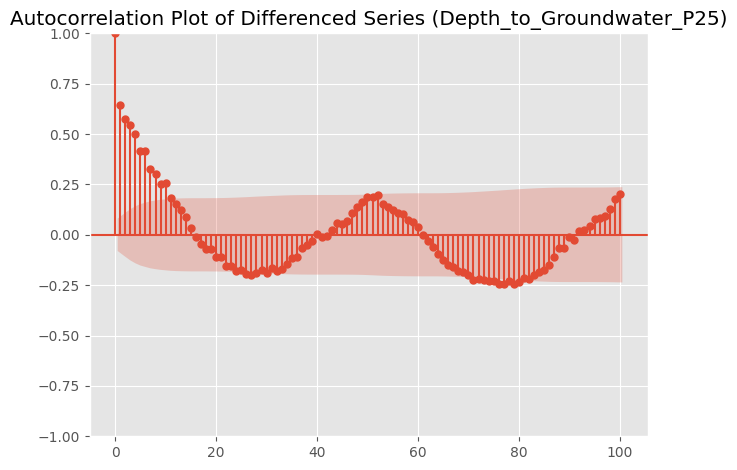

In [30]:
# Import necessary libraries
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Step 1: Apply first-order differencing to 'Depth_to_Groundwater_P25'
data_cleaned_w['Depth_to_Groundwater_P25_diff'] = data_cleaned_w['Depth_to_Groundwater_P25'].diff()

# Step 2: Drop the first NaN value generated by differencing
differenced_series = data_cleaned_w['Depth_to_Groundwater_P25_diff'].dropna()

# Step 3: Plot the autocorrelation of the differenced time series
plt.figure(figsize=(10, 6))
plot_acf(differenced_series, lags=100, title="Autocorrelation Plot of Differenced Series (Depth_to_Groundwater_P25)")
plt.tight_layout()
plt.show()


Observations:


- Significant Reduction in Long-Term Autocorrelation:

In the original series, autocorrelations persisted across many lags, indicating strong non-stationarity. After differencing, the autocorrelations now decay much more quickly. This is a typical sign of a stationary series. 

GOOD SIGN!

- Seasonal Pattern Still Visible:

The plot shows a sinusoidal pattern, suggesting the presence of some remaining seasonality. This is expected for groundwater data, as it might reflect periodic variations related to seasons or hydrological cycles.

- Partial Stationarity Achieved:

The differencing process has removed a significant portion of the trend. While not perfectly stationary, the series is now closer to stationarity, which is a prerequisite for applying ARIMA models.

Now will apply the ARIMA model with the Seasonal component:

                                     SARIMAX Results                                      
Dep. Variable:           Depth_to_Groundwater_P25   No. Observations:                  480
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 265.062
Date:                            Sat, 04 Jan 2025   AIC                           -520.123
Time:                                    01:45:16   BIC                           -499.544
Sample:                                         0   HQIC                          -512.015
                                            - 480                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9252      0.019     48.652      0.000       0.888       0.962
ma.L1         -0.5274      0.036   

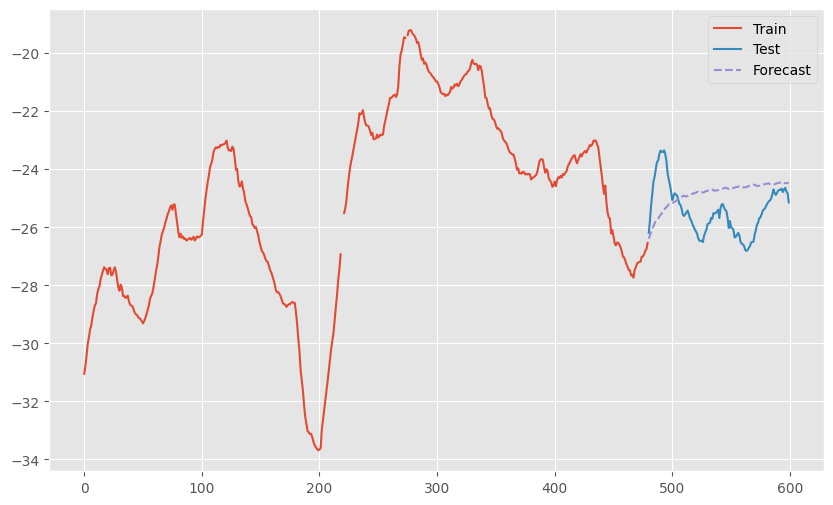

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'data_cleaned_w' contains your dataset with the target variable
# Define train and test splits
train_size = int(0.8 * len(data_cleaned_w))
train = data_cleaned_w.iloc[:train_size]
test = data_cleaned_w.iloc[train_size:]

# Fit SARIMA model (adjust p, d, q, P, D, Q, m based on your data)
model = SARIMAX(train['Depth_to_Groundwater_P25'], 
                order=(1, 1, 1),  # p, d, q
                seasonal_order=(1, 1, 1, 12),  # P, D, Q, m
                enforce_stationarity=False, 
                enforce_invertibility=False)

sarima_result = model.fit(disp=False)
print(sarima_result.summary())

# Forecast
forecast = sarima_result.forecast(steps=len(test))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Depth_to_Groundwater_P25'], label='Train')
plt.plot(test.index, test['Depth_to_Groundwater_P25'], label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.show()

Residual Plot Analysis:

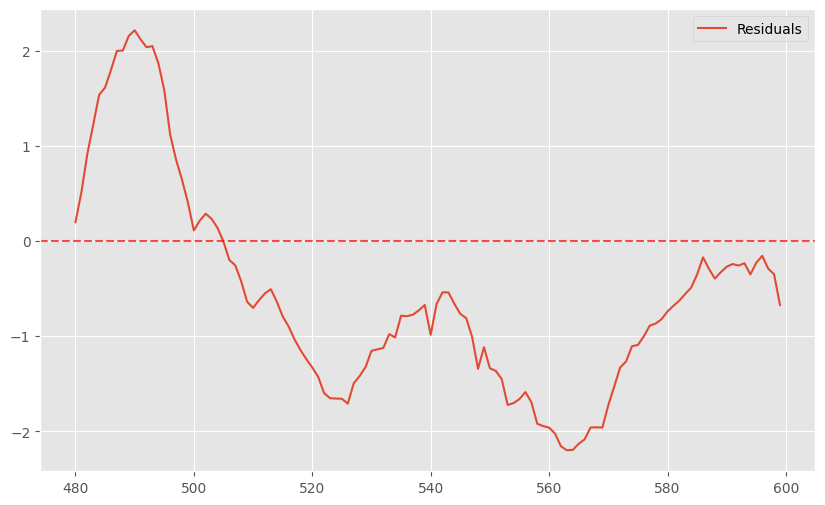

In [32]:
residuals = test['Depth_to_Groundwater_P25'] - forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, residuals, label="Residuals")
plt.axhline(0, linestyle="--", color="red", alpha=0.7)
plt.legend()
plt.show()

- The residuals are mostly centered around the zero line. WHICH IS VERY POSITIVE!

- The residuals mostly fall between -2 and +2, indicating the model performs reasonably well.

- The residuals' spread appears relatively consistent, indicating no significant heteroscedasticity (i.e., changing variance over time). This is good because it suggests the model's performance is stable.

THE MODEL IS GOOD!!⭐

Next Steps

To evaluate the precision of the model and identify areas of improvement, calculate the following parameters: MAE, RMSE, and MAPE to quantify how well the forecast aligns with the test data.

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['Depth_to_Groundwater_P25'], forecast)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test['Depth_to_Groundwater_P25'] - forecast) / test['Depth_to_Groundwater_P25'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 1.547589415017199
Root Mean Squared Error (RMSE): 1.2440214688731055
Mean Absolute Percentage Error (MAPE): 4.20%


Evaluation of Error Metrics:

**Mean Squared Error (MSE): 1.548**
The MSE measures the average of the squared differences between the predicted and actual values. A lower MSE indicates better accuracy. Here, the MSE of 1.548 is relatively low, suggesting <u>the model effectively captures the variability in the groundwater depth data.**</u>

**Root Mean Squared Error (RMSE): 1.244**
RMSE, the square root of MSE, is expressed in the same unit as the target variable (Depth to Groundwater). This value of 1.244 indicates that, on average, <u>the model’s predictions deviate by approximately 1.244 meter from the actual values. Given the dataset's natural variation, this error seems acceptable for forecasting.</u>

**Mean Absolute Percentage Error (MAPE): 4.20%**
MAPE represents the average deviation as a percentage of the actual values. A 4.20% MAPE indicates that the predictions are, on average, within 4.20% of the true values. <u>This is an excellent result, reflecting high model precision, particularly in environmental time series where variability is often substantial.</u>


# Study Conclusions:

- Model Performance:
The SARIMA model performs exceptionally well, as reflected by the low error metrics (MSE, RMSE, and MAPE). The results indicate that the model accurately captures both the seasonal and non-seasonal dynamics of the groundwater depth data.

- Graphical Analysis:
The forecast aligns well with the test data, capturing the overall trends and seasonality. The slight deviations can be attributed to the inherent complexity and natural variations in environmental data, but these deviations are minimal, as the error metrics demonstrate.


The parameter **Groundwater depth** is a critical parameter for environmental and resource management. A highly accurate forecasting model like this one could enable better decision-making for agriculture, water resource planning, and environmental conservation. The ability to predict groundwater fluctuations with high precision ensures proactive measures can be implemented.



------------------------------------------------------------------------------------------

Now lets save the model

In [34]:
import pickle

# Save the model to a file using pickle
model_filename = "sarima_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(sarima_result, file)

print(f"SARIMA model saved to {model_filename}")

SARIMA model saved to sarima_model.pkl
